# Project - CO2 Per Capita

## Цель

- изучить набор данных по выбросам CO2 на душу населения

## Step 1: Получение
- идентифицируем и импортируем данные

### Step 1.a:


In [1]:
import pandas as pd

### Step 1.b: Чтение данных


In [3]:
data = pd.read_csv('WorldBank-ATM.CO2E.PC_DS2.csv', index_col = 0)
data.head()

,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,204.631696,0.906060,0.046057,0.090880,0.100835,1.258195,NaN,0.609268,0.119037,2.383343,...,NaN,0.181947,NaN,3.121158,0.135031,NaN,0.011038,5.727223,NaN,NaN
1961,208.837879,0.922474,0.053589,0.095283,0.082204,1.374186,NaN,0.662618,0.109136,2.458551,...,NaN,0.183099,NaN,3.068090,0.163542,NaN,0.013599,5.832621,NaN,NaN
1962,226.081890,0.930816,0.073721,0.096612,0.210533,1.439956,NaN,0.727117,0.163542,2.538447,...,NaN,0.217694,0.595002,3.114839,0.158377,NaN,0.012729,5.887168,NaN,NaN
1963,214.785217,0.940570,0.074161,0.112376,0.202739,1.181681,NaN,0.853116,0.175833,2.330685,...,NaN,0.196997,0.471849,3.221195,0.184037,NaN,0.014518,5.961337,NaN,NaN
1964,207.626699,0.996033,0.086174,0.133258,0.213562,1.111742,NaN,0.972381,0.132815,2.553442,...,NaN,0.209870,0.864427,3.324046,0.208106,NaN,0.017550,6.332343,0.946606,1.034904


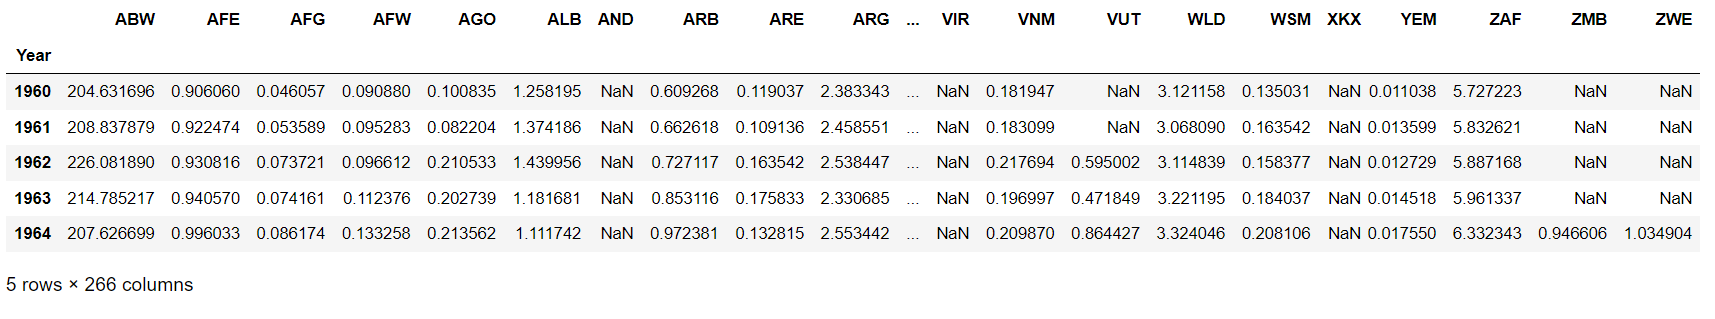

### Step 1.c: Размер


In [4]:
data.shape

(59, 266)

(59, 266)

## Step 2: Подготовка
- Изучение, очистка и визуализация

### Step 2.a: Проверка типов данных

- Мы ожидаем, что все данные будут числовыми


In [5]:
data.dtypes

ABW    float64
AFE    float64
AFG    float64
AFW    float64
AGO    float64
        ...   
XKX    float64
YEM    float64
ZAF    float64
ZMB    float64
ZWE    float64
Length: 266, dtype: object

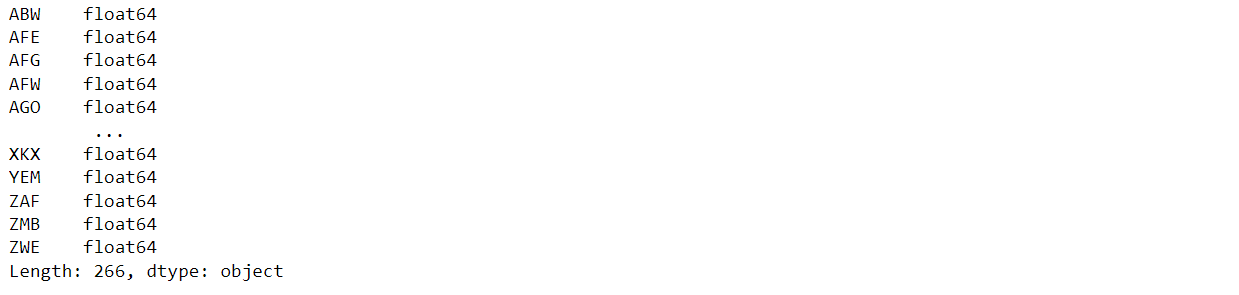

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1960 to 2018
Columns: 266 entries, ABW to ZWE
dtypes: float64(266)
memory usage: 123.1 KB


`<class 'pandas.core.frame.DataFrame'>`
`Int64Index: 59 entries, 1960 to 2018`
`Columns: 266 entries, ABW to ZWE`
`dtypes: float64(266)`
`memory usage: 123.1 KB`

### Шаг 2.b: Проверьте наличие нулевых (отсутствующих) значений
- В данных часто отсутствуют записи - для этого может быть много причин
- Нам нужно разобраться с этим (сделаем позже в курсе)
- Используйте ``.isnull().any()``
- Это ожидаемо, но мы должны знать об этом

In [7]:
data.isnull().any()

ABW     True
AFE    False
AFG    False
AFW    False
AGO    False
       ...  
XKX     True
YEM    False
ZAF    False
ZMB     True
ZWE     True
Length: 266, dtype: bool

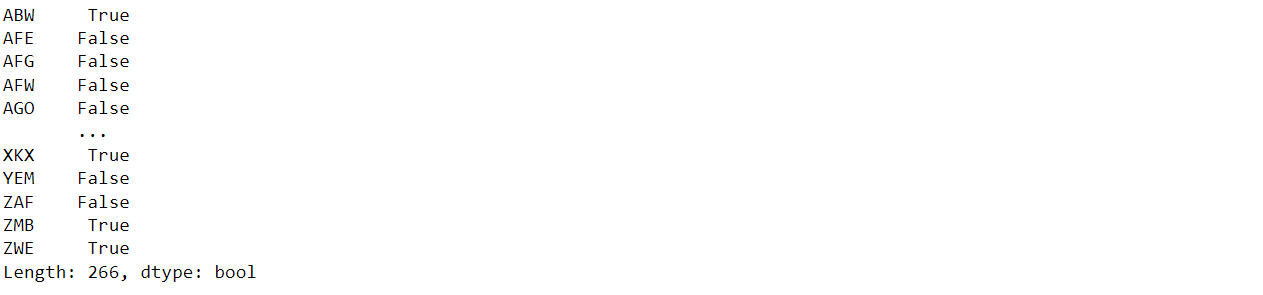

### Шаг 2.c: Визуализация количества отсутствующих точек данных


<AxesSubplot:ylabel='Frequency'>

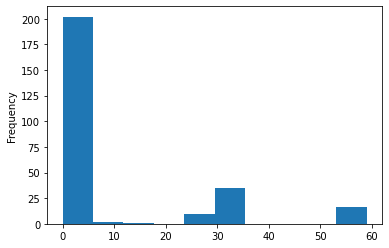

In [8]:
data.isnull().sum().plot.hist() #сколько стран имеют пропущенные значения в диапазонах

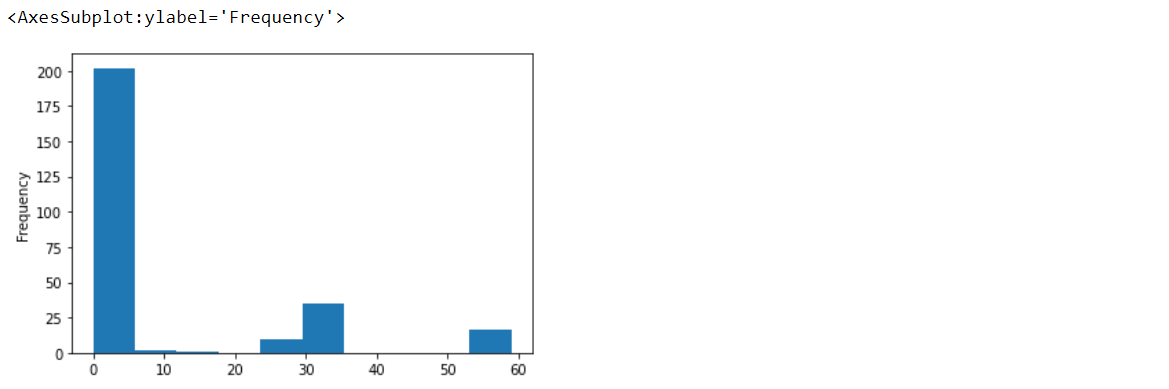

In [9]:
data.isnull().sum() #количество пропущенных значений для каждой страны

ABW    29
AFE     0
AFG     0
AFW     0
AGO     0
       ..
XKX    59
YEM     0
ZAF     0
ZMB     4
ZWE     4
Length: 266, dtype: int64

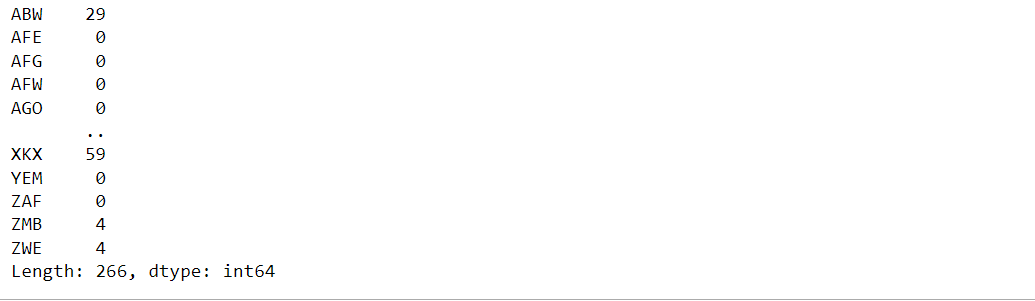

### Шаг 2.d: Очистка данных
- Простой способ очистки данных - удалить столбцы с отсутствующими данными


In [10]:
data_clean = data.dropna(axis='columns')
data_clean.shape

(59, 191)

(59, 191)

## Step 3: Анализ


### Шаг 3.a: Процентное изменение за 20 лет
- Рассчитать изменение CO2 на душу населения с 1998 по 2018 год
    - формула (значение в 2018 году - значение в 1998 году) / значение в 1998 году

In [11]:
changes_data = (data_clean.loc[2018] - data_clean.loc[1998])/data_clean.loc[1998]
changes_data

AFE   -0.037269
AFG    2.762415
AFW    0.116810
AGO    0.198752
ALB    2.371394
         ...   
VNM    3.698443
WLD    0.185926
WSM    1.014300
YEM   -0.541857
ZAF    0.104416
Length: 191, dtype: float64

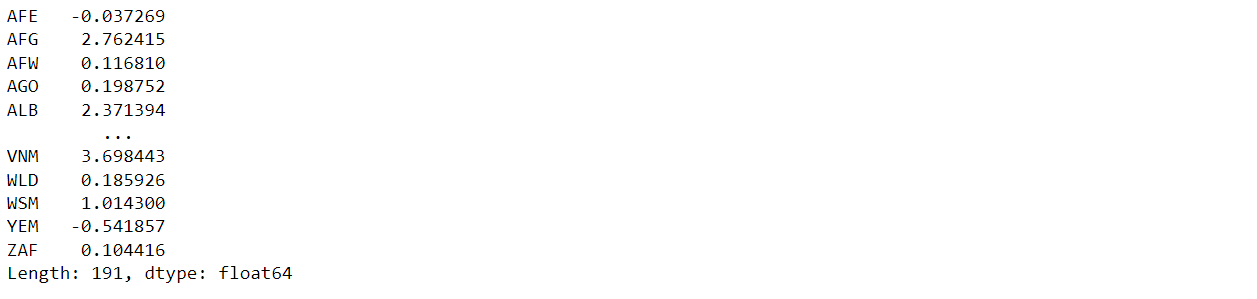

### Шаг 3.b: Описание данные


In [12]:
changes_data.describe()

count    191.000000
mean       0.494745
std        1.341795
min       -0.737721
25%       -0.101786
50%        0.198752
75%        0.643839
max       15.694284
dtype: float64

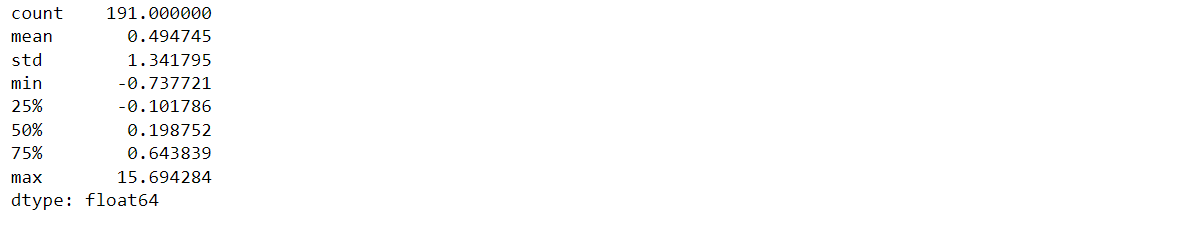

In [13]:
changes_data.index[changes_data>10]

Index(['LAO'], dtype='object')

Index(['LAO'], dtype='object')

есть максимальное значение - 15.69. Это много, что говорит о больших проблемах с экологией в этой стране. Либо может быть страна не ввела учета значений раньше.

### Шаг 3.c: Визуализация данных
- Это поможет лучше понять данные


<AxesSubplot:ylabel='Frequency'>

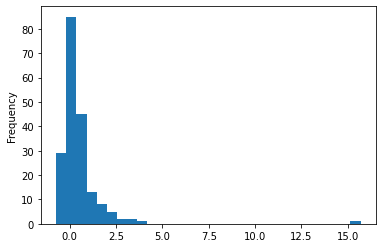

In [15]:
changes_data.plot.hist(bins=30)

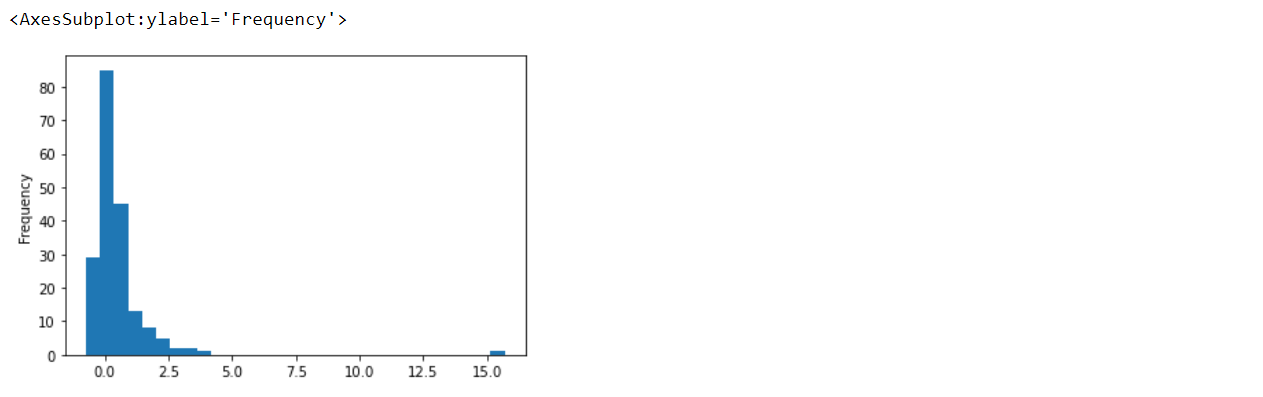

- в большинстве страны имеют одинаковый показатель близкий к нулю
- при увеличении показателя, все меньше и меньше стран встречаются
- виден выброс в значении 15. Как раз та страна, где такой странный показатель

In [18]:
(changes_data<0).value_counts()

False    123
True      68
dtype: int64

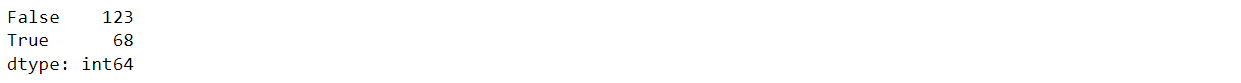

<AxesSubplot:ylabel='None'>

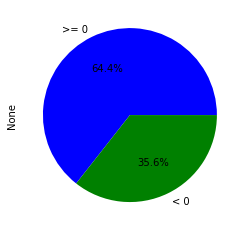

In [21]:
(changes_data<0).value_counts().plot.pie(colors=['b', 'g'], labels=['>= 0', '< 0'], autopct='%1.1f%%') #процентное соотношение

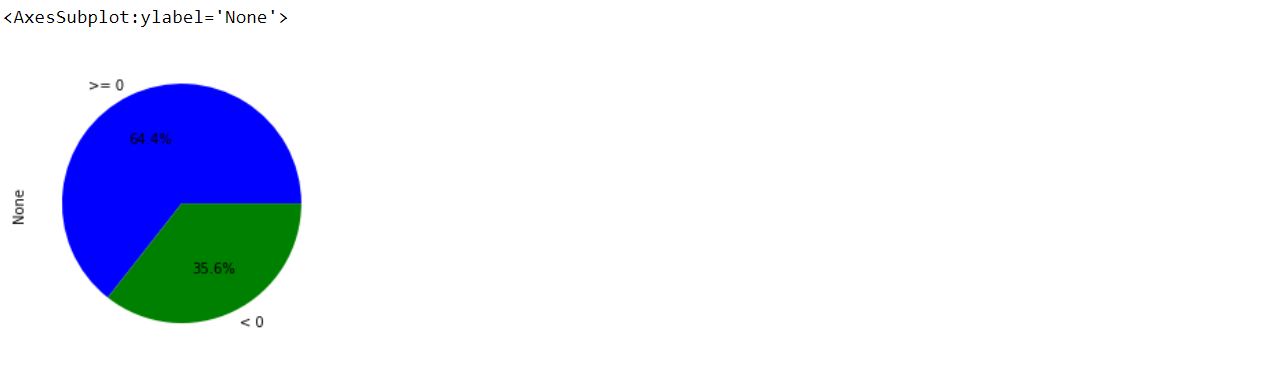

большинство стран увеличивают свой показатель, что печально